<a href="https://colab.research.google.com/github/armelyara/Hello-world-with-TensorFlow/blob/master/5deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import packages
import os
import zipfile

In [5]:
#Path for download data
local_zip = '/tmp/5DeepProject.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
base_dir = '/tmp'

train_dir = os.path.join(base_dir, 'train/seg_train')
test_dir = os.path.join(base_dir, 'test/seg_test')

# Directory with our training buildings/forest/glacier/mountain/sea/street pictures
train_buildings_dir = os.path.join(train_dir, 'buildings')
train_forest_dir = os.path.join(train_dir, 'forest')
train_glacier_dir = os.path.join(train_dir, 'glacier')
train_mountain_dir = os.path.join(train_dir, 'mountain')
train_sea_dir = os.path.join(train_dir, 'sea')
train_street_dir = os.path.join(train_dir, 'street')

# Directory with our validation buildings/forest/glacier/mountain/sea/street pictures
test_buildings_dir = os.path.join(test_dir, 'buildings')
test_forest_dir = os.path.join(test_dir, 'forest')
test_glacier_dir = os.path.join(test_dir, 'glacier')
test_mountain_dir = os.path.join(test_dir, 'mountain')
test_sea_dir = os.path.join(test_dir, 'sea')
test_street_dir = os.path.join(test_dir, 'street')

In [7]:
train_buildings_fnames = os.listdir( train_buildings_dir )
train_forest_fnames = os.listdir( train_forest_dir )
train_glacier_fnames = os.listdir( train_glacier_dir )
train_mountain_fnames = os.listdir( train_mountain_dir )
train_sea_fnames = os.listdir( train_sea_dir )
train_street_fnames = os.listdir( train_street_dir )

print(train_buildings_fnames[:10])
print(train_forest_fnames[:10])
print(train_glacier_fnames[:10])
print(train_mountain_fnames[:10])
print(train_sea_fnames[:10])
print(train_street_fnames[:10])

['13352.jpg', '6232.jpg', '19584.jpg', '16912.jpg', '3067.jpg', '4571.jpg', '7891.jpg', '6747.jpg', '2796.jpg', '12802.jpg']
['3377.jpg', '13551.jpg', '13159.jpg', '845.jpg', '11687.jpg', '3368.jpg', '9246.jpg', '6527.jpg', '13312.jpg', '13386.jpg']
['10993.jpg', '10025.jpg', '12101.jpg', '10104.jpg', '5442.jpg', '7550.jpg', '998.jpg', '187.jpg', '12503.jpg', '10508.jpg']
['2382.jpg', '10815.jpg', '12472.jpg', '12886.jpg', '4886.jpg', '12616.jpg', '11111.jpg', '7359.jpg', '5939.jpg', '11358.jpg']
['1980.jpg', '1447.jpg', '12013.jpg', '8709.jpg', '15210.jpg', '13298.jpg', '15711.jpg', '6853.jpg', '4914.jpg', '65.jpg']
['3360.jpg', '1385.jpg', '7834.jpg', '2343.jpg', '13605.jpg', '19736.jpg', '3619.jpg', '8958.jpg', '17394.jpg', '7300.jpg']


In [8]:
#Let's find out the total number of buildings,forest,glacier,mountain,sea and street images in the `train` and `validation` directories:

print('total training buildings images :', len(os.listdir(      train_buildings_dir ) ))
print('total training forest images :', len(os.listdir(      train_forest_dir ) ))
print('total training glacier images :', len(os.listdir(      train_glacier_dir ) ))
print('total training mountain images :', len(os.listdir(      train_mountain_dir ) ))
print('total training sea images :', len(os.listdir(      train_sea_dir ) ))
print('total training street images :', len(os.listdir(      train_street_dir ) ))

print('total test buildings images :', len(os.listdir( test_buildings_dir )))
print('total test forest images :', len(os.listdir( test_forest_dir ) ))
print('total test glacier images :', len(os.listdir( test_glacier_dir ) ))
print('total test mountain images :', len(os.listdir( test_mountain_dir ) ))
print('total test sea images :', len(os.listdir( test_sea_dir ) ))
print('total test street images :', len(os.listdir( test_street_dir ) ))

total training buildings images : 2191
total training forest images : 2271
total training glacier images : 2404
total training mountain images : 2512
total training sea images : 2274
total training street images : 2382
total test buildings images : 437
total test forest images : 474
total test glacier images : 553
total test mountain images : 525
total test sea images : 510
total test street images : 501


In [9]:
import tensorflow as tf

"""Next we will define a Sequential layer as before, adding some convolutional layers first. Note the input shape parameter this time. In the earlier example it was 28x28x1, because the image was 28x28 in greyscale (8 bits, 1 byte for color depth). This time it is 300x300 for the size and 3 (24 bits, 3 bytes) for the color depth.

We then add a couple of convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a six-class classification problem, i.e. a *categorical classification problem*, we will end our network with a [*softmax* activation](https://en.wikipedia.org/wiki/Softmax_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).
"""

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [10]:
"""The model.summary() method call prints a summary of the NN """

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [11]:
"""The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)
"""

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
"""### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.
"""

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=5,
                                                    class_mode='categorical',
                                                    target_size=(300, 300))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=5,
                                                         class_mode  = 'categorical',
                                                         target_size = (300, 300))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
"""### Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

Do note the values per epoch.

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy. 

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. The Validation accuracy is the measurement with the data that has not been used in training. As expected this would be a bit lower. You'll learn about why this occurs in the section on overfitting later in this course.

"""

history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=10,
                              epochs=100,
                              validation_steps=10,
                              verbose=2)

Epoch 1/100
10/10 - 9s - loss: 0.8799 - accuracy: 0.6600 - val_loss: 0.8778 - val_accuracy: 0.7200
Epoch 2/100
10/10 - 8s - loss: 0.9899 - accuracy: 0.6400 - val_loss: 0.8306 - val_accuracy: 0.7200
Epoch 3/100
10/10 - 8s - loss: 0.6566 - accuracy: 0.7000 - val_loss: 0.8472 - val_accuracy: 0.6400
Epoch 4/100
10/10 - 8s - loss: 0.8165 - accuracy: 0.6200 - val_loss: 1.0332 - val_accuracy: 0.7400
Epoch 5/100
10/10 - 8s - loss: 0.8325 - accuracy: 0.6800 - val_loss: 0.8088 - val_accuracy: 0.6800
Epoch 6/100
10/10 - 8s - loss: 0.7017 - accuracy: 0.6800 - val_loss: 1.8848 - val_accuracy: 0.6200
Epoch 7/100
10/10 - 8s - loss: 0.8652 - accuracy: 0.6000 - val_loss: 0.9611 - val_accuracy: 0.6600
Epoch 8/100
10/10 - 8s - loss: 0.5557 - accuracy: 0.8000 - val_loss: 0.8165 - val_accuracy: 0.7200
Epoch 9/100
10/10 - 8s - loss: 0.7079 - accuracy: 0.7600 - val_loss: 0.8125 - val_accuracy: 0.7600
Epoch 10/100
10/10 - 8s - loss: 0.5107 - accuracy: 0.8600 - val_loss: 1.1542 - val_accuracy: 0.6800
Epoch 11/

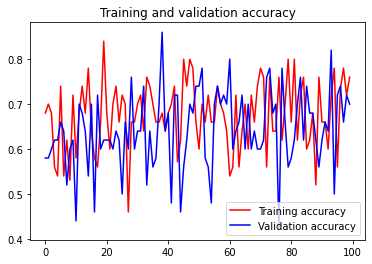

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()